In [108]:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

from tinyshap import SHAPExplainer

## Get the data

In [109]:
dataset = load_diabetes()
# Keep only 4 features to keep it simple
X = pd.DataFrame(dataset["data"], columns=dataset["feature_names"])
y = dataset["target"]

X.head(2)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204


In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Train a regression model

In [111]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor()

## Explain all predictions

In [112]:
X_train_summary = pd.DataFrame(KMeans(n_clusters=10, n_init="auto").fit(X_train).cluster_centers_, columns=X.columns)

In [113]:
explainer = SHAPExplainer(model.predict, X=X_train_summary)

In [114]:
contributions = explainer.shap_values(X)
contributions.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,avg_prediction
0,2.270321,-9.183698,22.502437,-9.657530,6.119525,-5.668109,5.627670,-10.179521,8.350366,4.180911,166.104690
1,-7.768252,5.941934,-27.831304,-9.970369,17.900320,-2.176397,-30.258415,-2.920324,-36.793451,4.739128,156.645080
2,-9.826191,-6.023176,22.226444,-2.512150,6.621658,-7.368296,11.209821,-3.433084,-10.279526,13.807479,153.694706
3,10.724490,17.315692,-11.187328,9.226834,-7.237193,-2.000709,9.192571,-7.419078,40.579929,-4.516544,157.969359
4,-16.429479,10.047312,-40.040133,-3.898124,5.380980,-0.322713,-6.770623,-5.544113,-20.007961,1.917610,178.282786


## Dependence plot

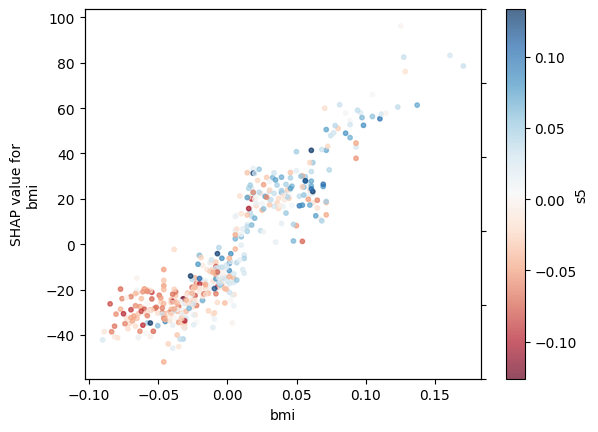

In [115]:
feature_name_1 = "bmi"
feature_name_2 = "s5"

fig, ax = plt.subplots()

h= ax.scatter(X[feature_name_1], contributions[feature_name_1], s=10, alpha=0.7, c=X[feature_name_2], cmap="RdBu")
fig.colorbar(h)
ax.set_xlabel(feature_name_1)
ax.set_ylabel(f"SHAP value for\n{feature_name_1}")
ax2 = ax.twinx()
ax2.set_yticklabels([])
ax2.set_ylabel(feature_name_2, labelpad=60)
plt.show()